In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

df=pd.read_excel("/content/USA_Housing.xlsx")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
print(df.describe())

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.61

In [ ]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,0.057750,-0.160825,0.266532,-0.031823,0.644493
Avg. Area House Age,0.057750,1.000000,-0.737428,-0.395408,0.211801,0.402323
Avg. Area Number of Rooms,-0.160825,-0.737428,1.000000,0.510447,0.193847,-0.144129
Avg. Area Number of Bedrooms,0.266532,-0.395408,0.510447,1.000000,0.080870,0.157350
Area Population,-0.031823,0.211801,0.193847,0.080870,1.000000,0.650305
Price,0.644493,0.402323,-0.144129,0.157350,0.650305,1.000000


In [ ]:
Y_POSITION=5

In [ ]:
# Code for feature extraction and model splitting
model_1_features = [i for i in range(0, Y_POSITION)]

# Extracting features (X) and target variable (Y) from the DataFrame (df)
X = df.iloc[:, model_1_features]
Y = df.iloc[:, Y_POSITION]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)

In [ ]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2398,93876.428998,6.295679,7.259568,6.10,29096.519016
2360,72757.633356,4.045025,7.570622,6.35,39088.399403
3232,90293.031209,5.368755,8.078259,4.20,26550.712538
27,64626.880978,5.443360,6.988754,4.00,27784.742280
1246,70259.068392,6.757345,7.684912,6.05,54050.644689
...,...,...,...,...,...
4866,71816.253609,5.504488,8.193007,6.34,26990.299061
4077,74079.028135,7.469087,6.998925,3.40,32447.399194
2038,52122.954313,6.599764,7.910269,3.04,38764.820933
4812,61297.346240,5.605703,6.633719,4.31,26656.951718


In [ ]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lreg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Linear Regression model')
print('--'*30)
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)


Linear Regression model
------------------------------------------------------------
Mean Squared Error: 9906365045.05599


In [ ]:
from sklearn import tree


model2 = tree.DecisionTreeRegressor()
model2.fit(X_train, y_train)

print("Decision Tree")
print("=================================")

y_pred_train2 = model2.predict(X_train)
RMSE_train2 = mean_squared_error(y_train, y_pred_train2)
print("Decision Tree Train set: RMSE {}".format(RMSE_train2))

y_pred_test2 = model2.predict(X_test)
RMSE_test2 = mean_squared_error(y_test, y_pred_test2)
print("Decision Tree Test set: RMSE {}".format(RMSE_test2))

print("=================================")


Decision Tree
Decision Tree Train set: RMSE 0.0
Decision Tree Test set: RMSE 31309615997.322086


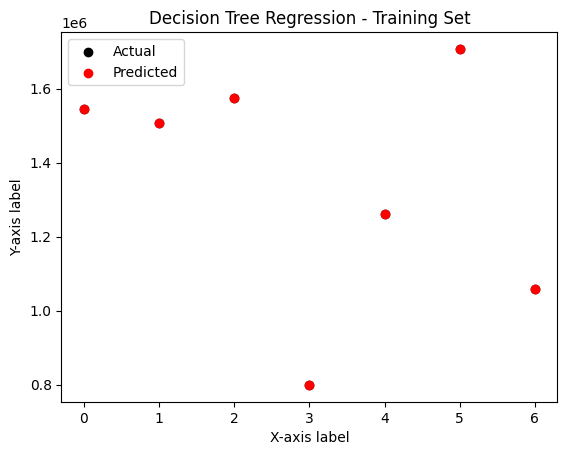

In [ ]:
# Assuming you already have the trained model and predictions:
y_pred_train2 = model2.predict(X_train)

plt.scatter(range(len(y_train)), y_train, color='black', label='Actual')
plt.scatter(range(len(y_pred_train2)), y_pred_train2, color='red', label='Predicted')
plt.title('Decision Tree Regression - Training Set')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.legend()
plt.show()


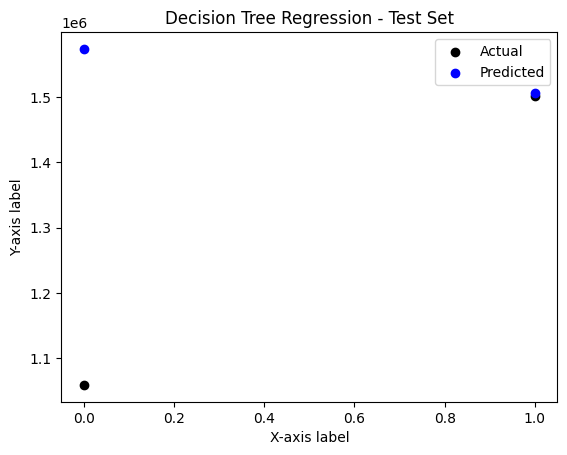

In [ ]:

# Predictions on the test set
y_pred_test2 = model2.predict(X_test)

plt.scatter(range(len(y_test)), y_test, color='black', label='Actual')
plt.scatter(range(len(y_pred_test2)), y_pred_test2, color='blue', label='Predicted')
plt.title('Decision Tree Regression - Test Set')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model3 = RandomForestRegressor()
model3.fit(X_train, y_train)

print("Random Forest Regressor")
print("=================================")

y_pred_train3 = model3.predict(X_train)
RMSE_train3 = mean_squared_error(y_train, y_pred_train3)
print("Random Forest Regressor TrainSet: RMSE {}".format(RMSE_train3))

y_pred_test3 = model3.predict(X_test)
RMSE_test3 = mean_squared_error(y_test, y_pred_test3)
print("Random Forest Regressor TestSet: RMSE {}".format(RMSE_test3))

print("=================================")


Random Forest Regressor
Random Forest Regressor TrainSet: RMSE 10906989679.32967
Random Forest Regressor TestSet: RMSE 58969867500.008865


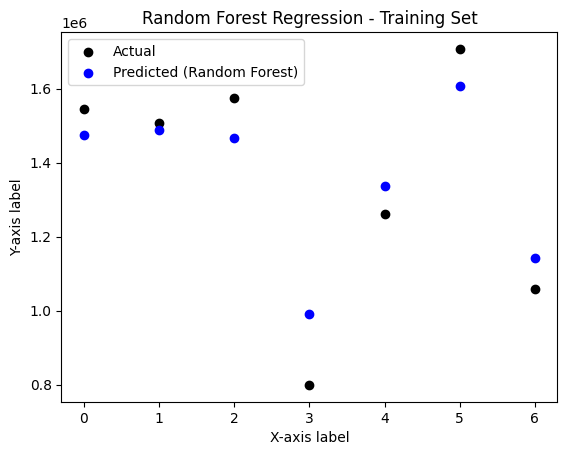

In [ ]:


# Predictions on the training set
y_pred_train3 = model3.predict(X_train)

plt.scatter(range(len(y_train)), y_train, color='black', label='Actual')
plt.scatter(range(len(y_pred_train3)), y_pred_train3, color='blue', label='Predicted (Random Forest)')
plt.title('Random Forest Regression - Training Set')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.legend()
plt.show()


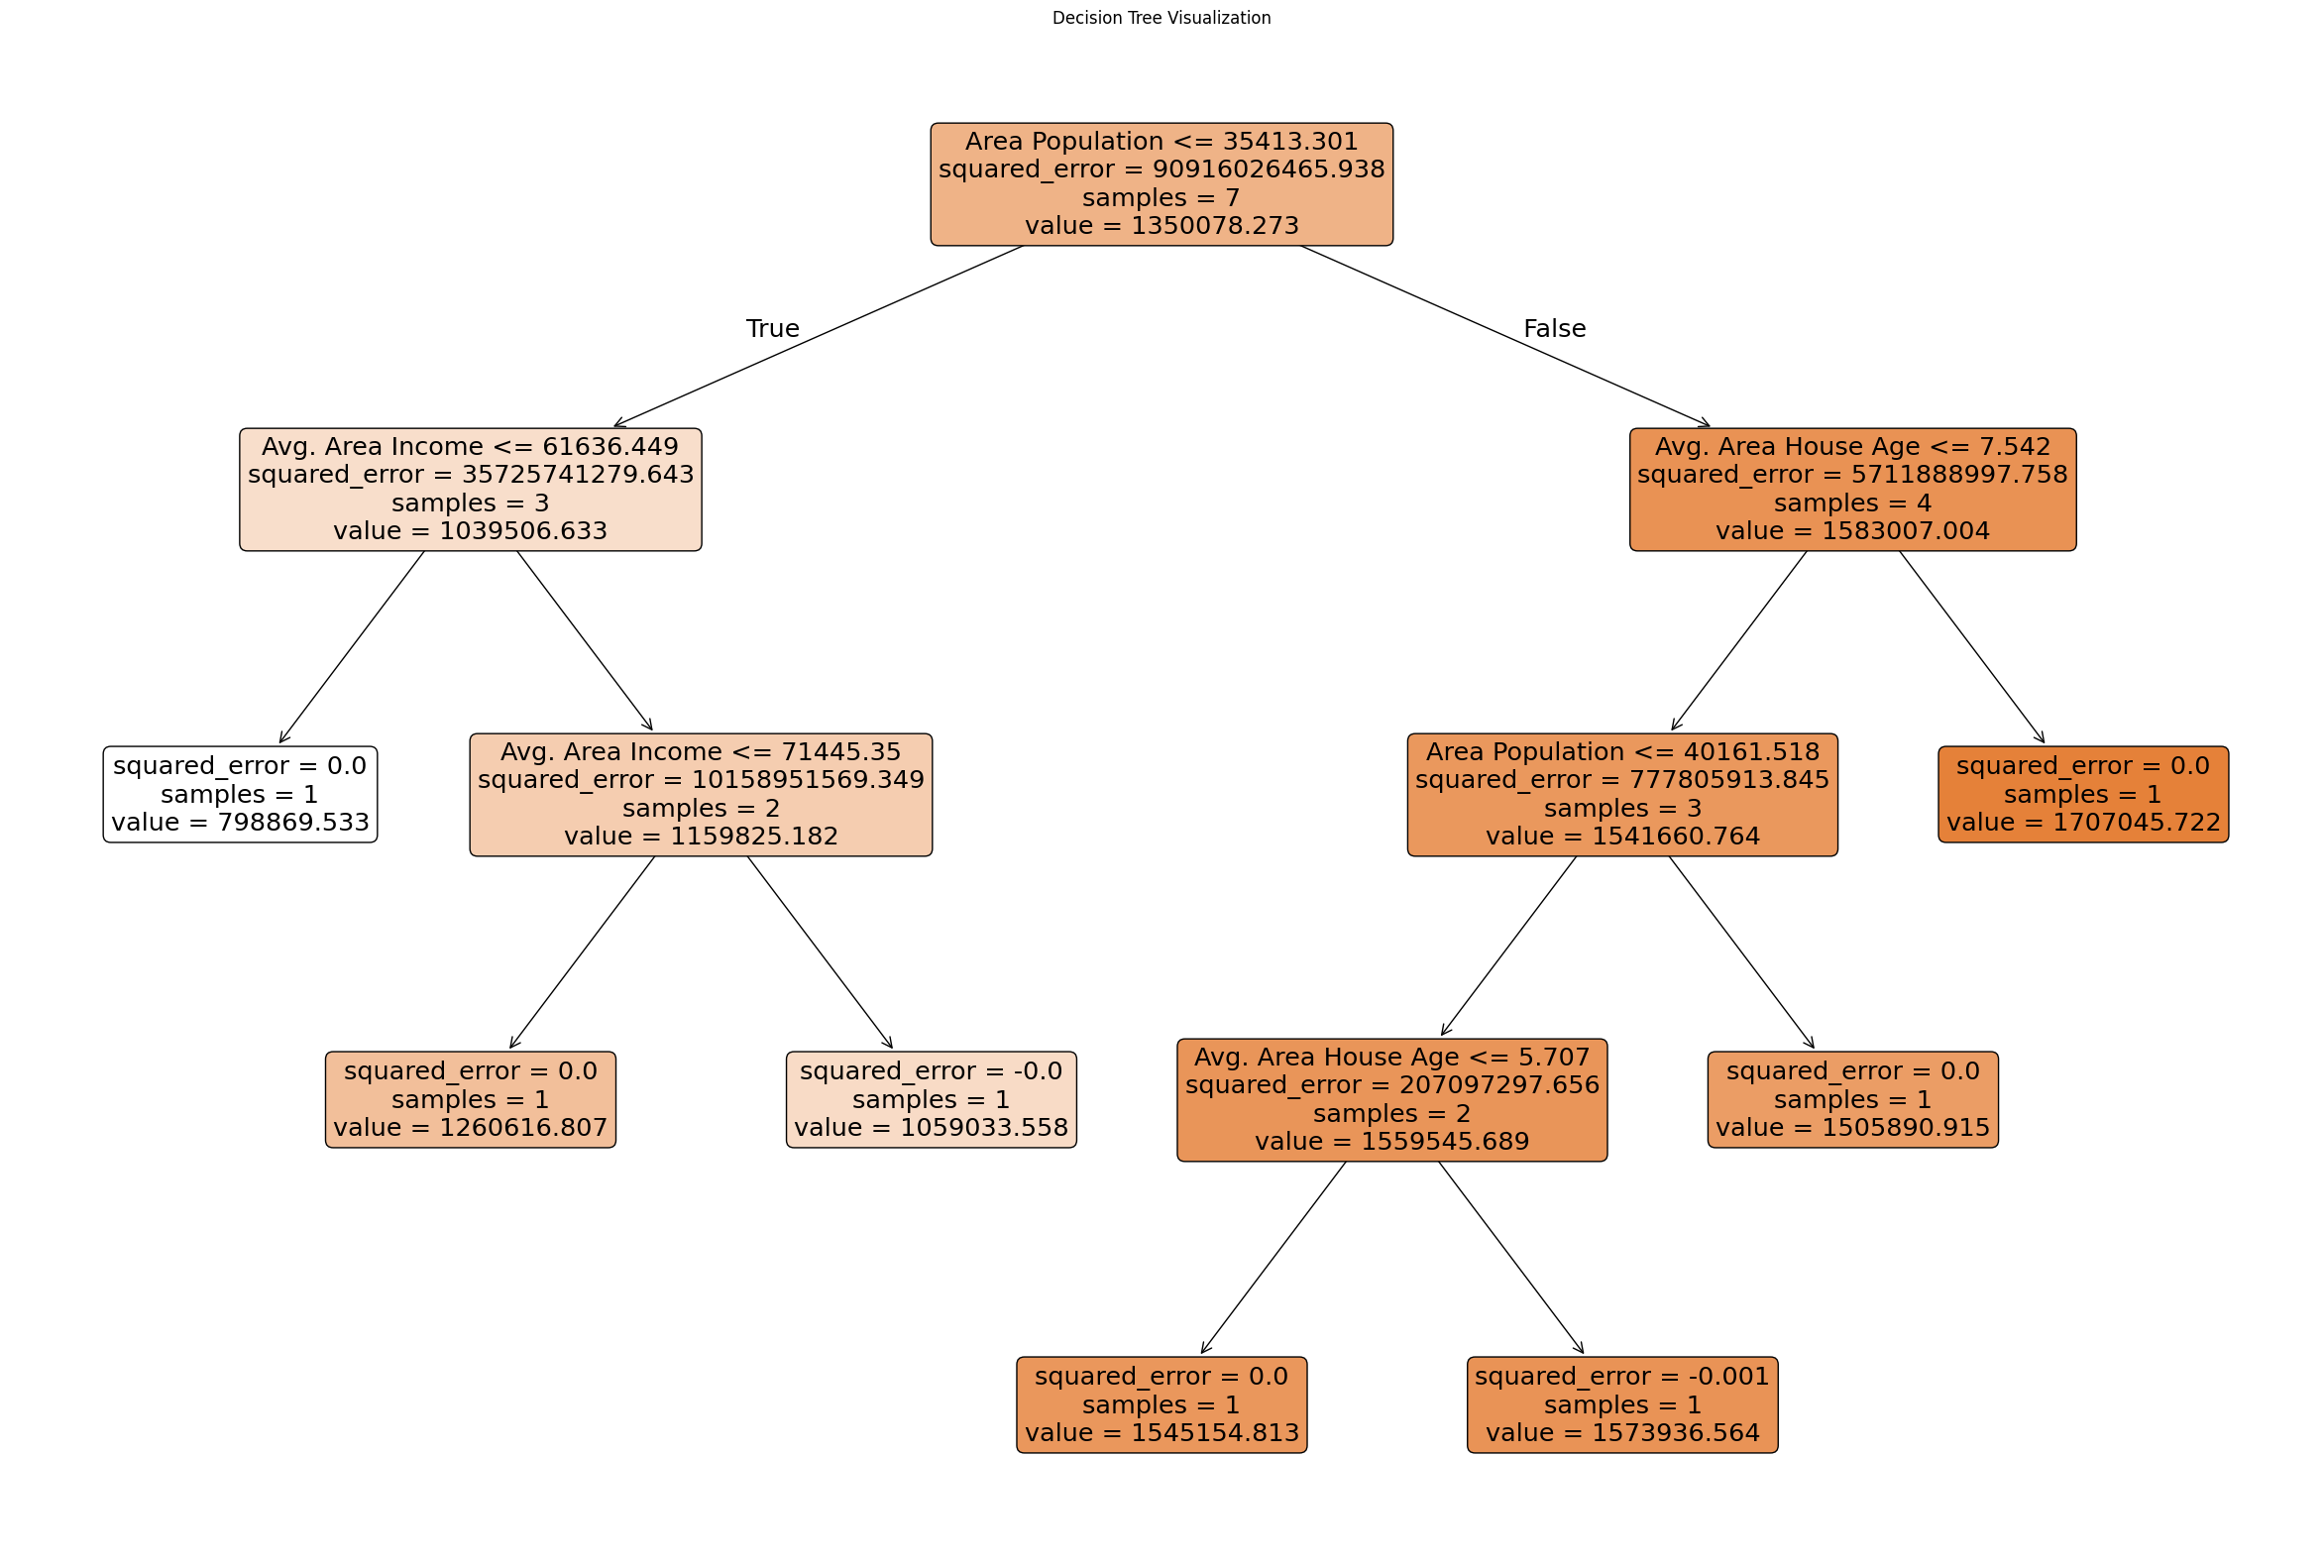

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,20))
plot_tree(model2, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


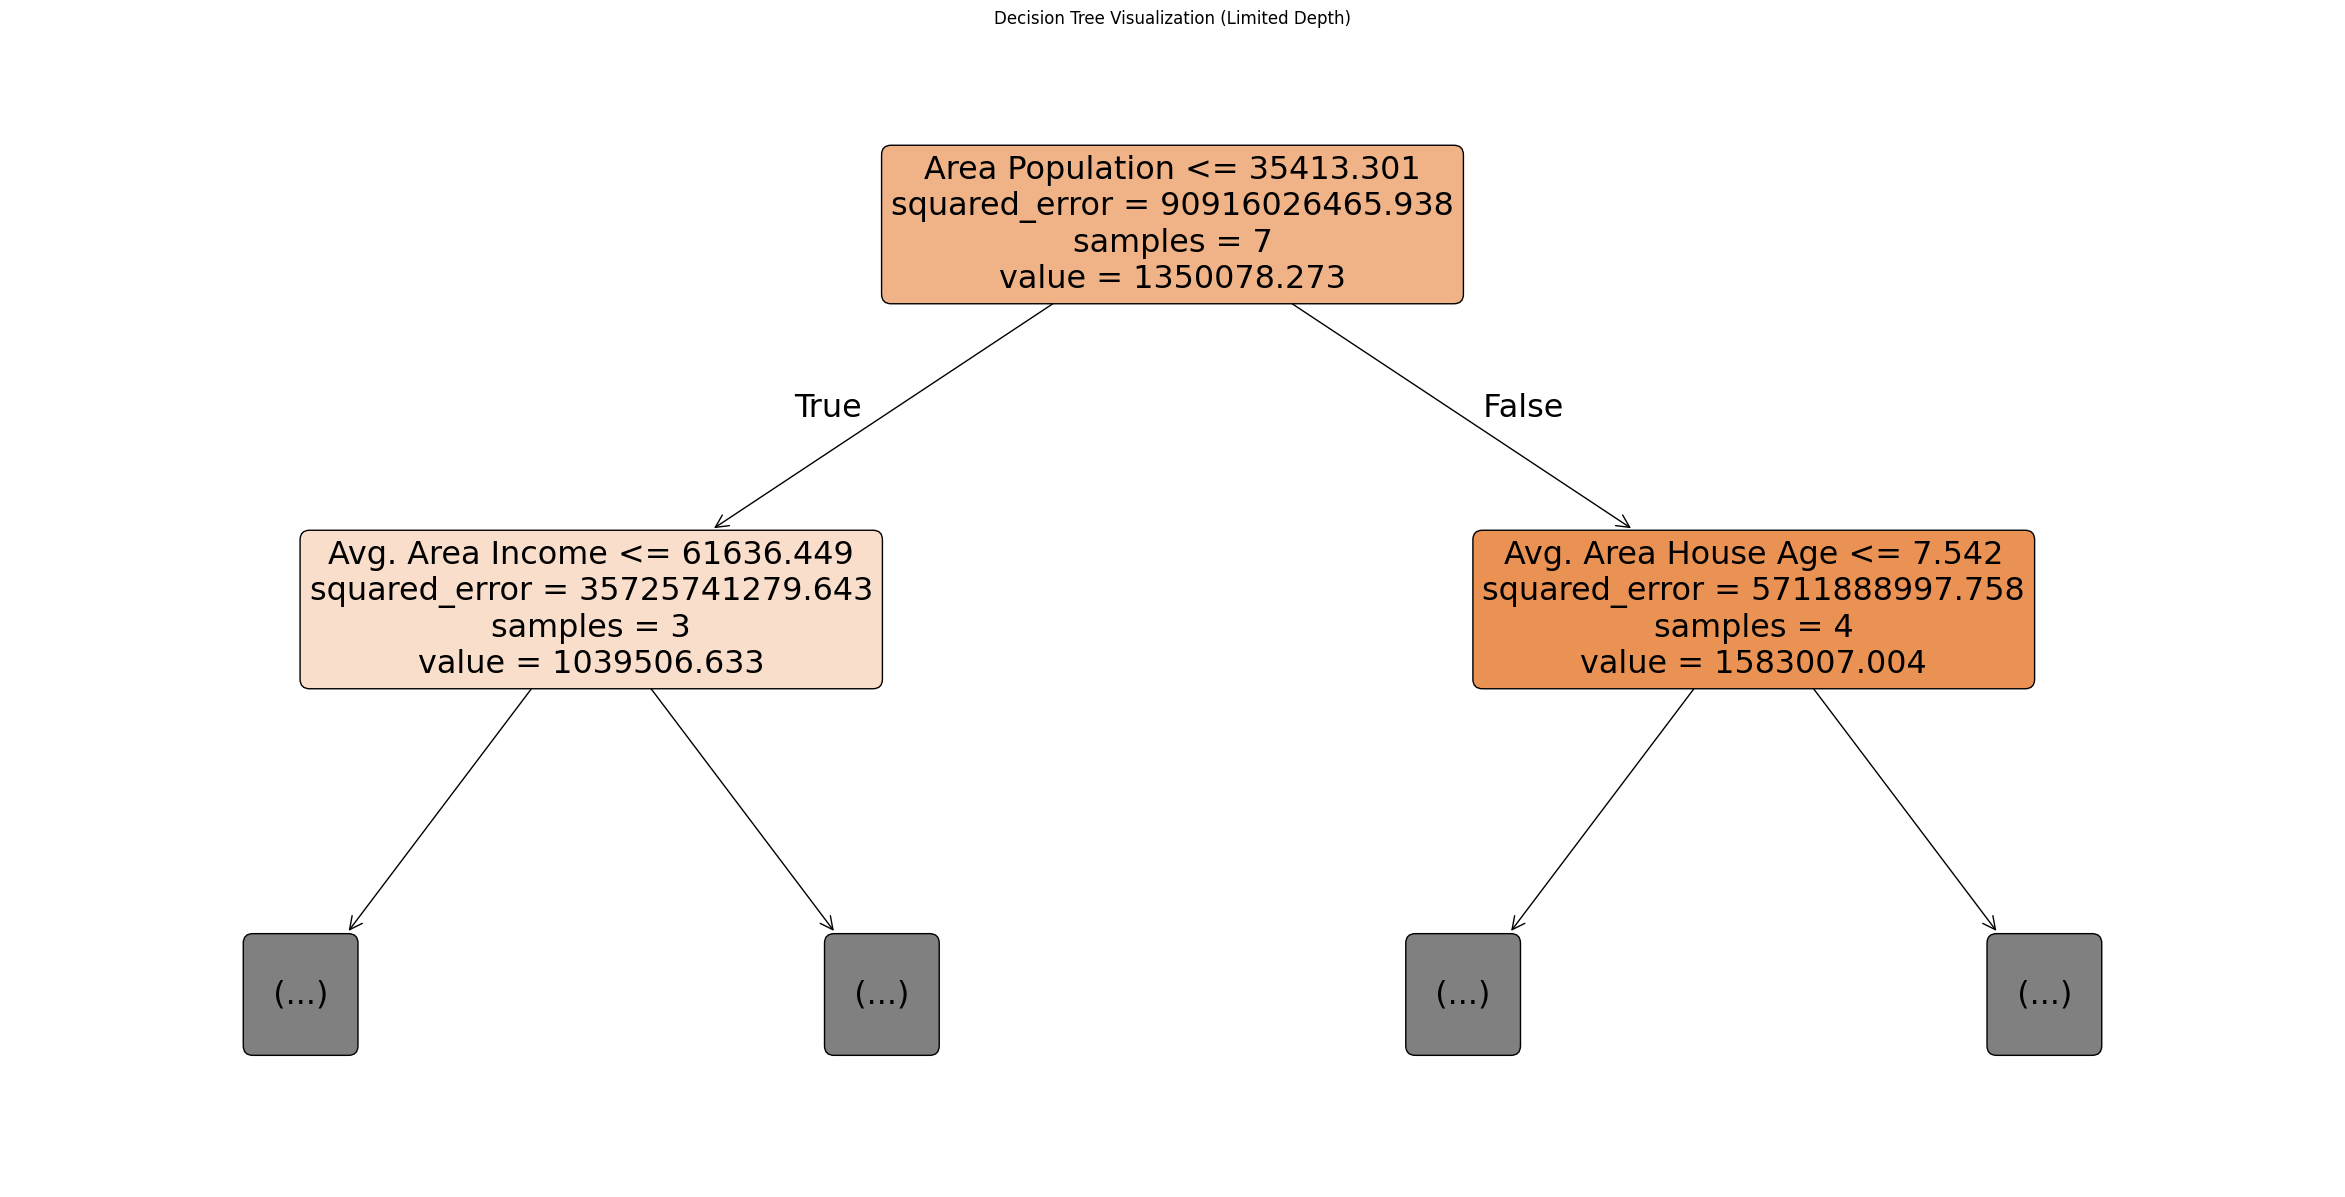

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15))  # Increase figure size for better readability
plot_tree(model2, max_depth=1, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree Visualization (Limited Depth)")
plt.show()


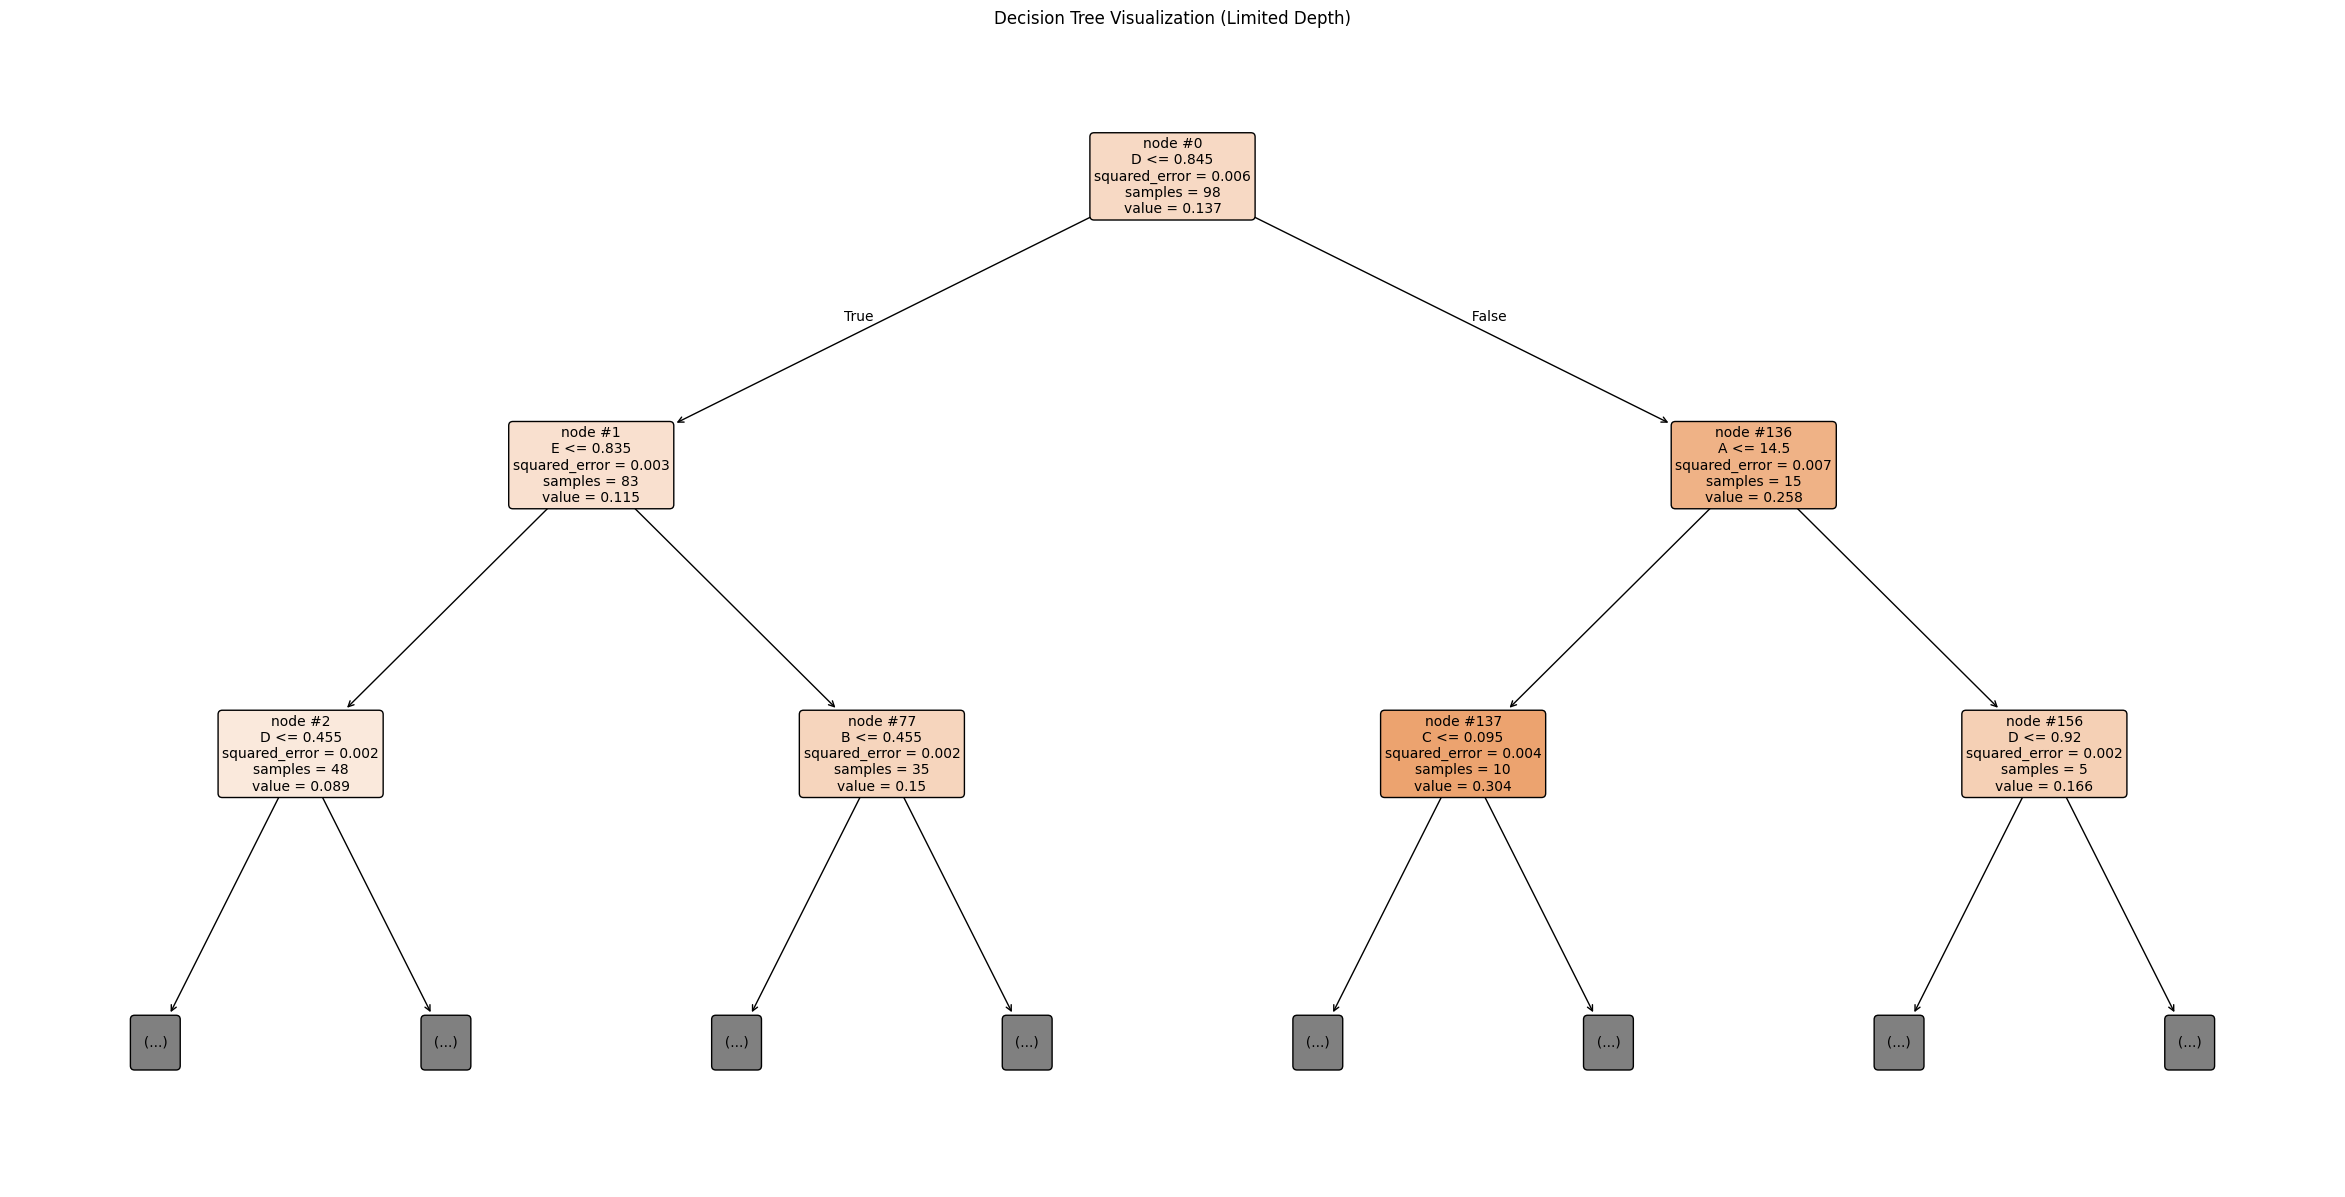

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15))
plot_tree(model2, max_depth=2, filled=True, feature_names=X.columns, rounded=True,
          node_ids=True, fontsize=10)  # added node_ids to add labels
plt.title("Decision Tree Visualization (Limited Depth)")
plt.show()